In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,classification_report,confusion_matrix,accuracy_score,precision_score, recall_score,f1_score

In [2]:
train_data = pd.read_csv(r'C:\Users\Admin\Downloads\train_LZdllcl.csv')
test_data = pd.read_csv(r'C:\Users\Admin\Downloads\test_2umaH9m.csv')

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.shape

(54808, 14)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
for i in train_data.columns:
  print(train_data[i].value_counts())
  print('---------------------------------------------')

65438    1
16223    1
38250    1
68086    1
78080    1
        ..
38645    1
76563    1
46788    1
75029    1
51526    1
Name: employee_id, Length: 54808, dtype: int64
---------------------------------------------
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
---------------------------------------------
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10 

In [9]:
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
series = train_data.isna().sum()
missing_total = series[series.values>0]

series1 = round(train_data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df = pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])
df

,Missing_total,Missing_percentage
education,2409,4.3953
previous_year_rating,4124,7.5244


In [11]:
train_data = train_data.dropna(how ='any')
train_data.isna().sum().sum()

0

In [12]:
train_data.shape

(48660, 14)

In [13]:
train_data.duplicated().sum()

0

In [14]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [15]:
nums = train_data.select_dtypes(include=['int64'])
print(nums.shape)
print(nums.columns)

(48660, 8)
Index(['employee_id', 'no_of_trainings', 'age', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')


C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\Anaconda3\lib\si

ValueError: num must be 1 <= num <= 7, not 8

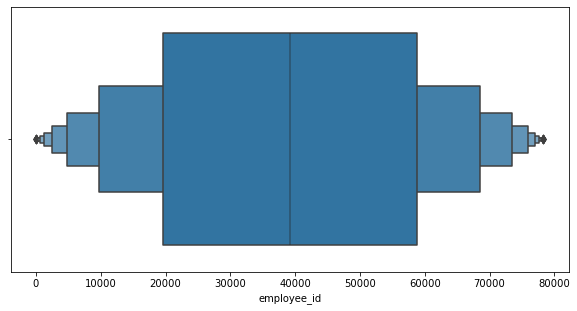

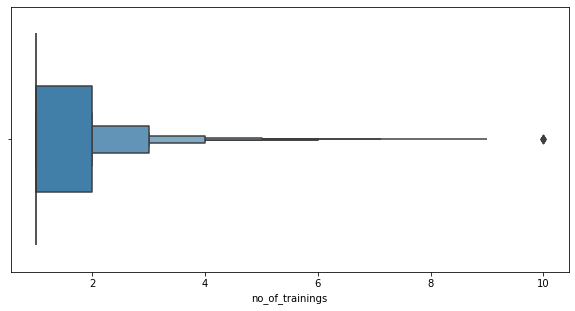

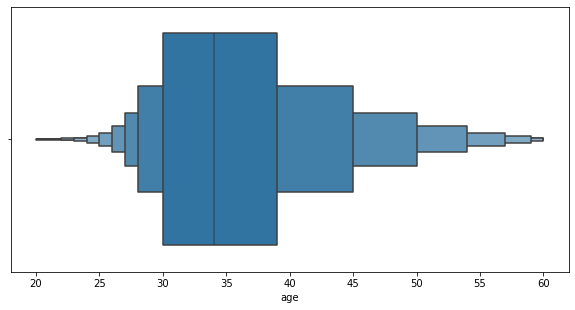

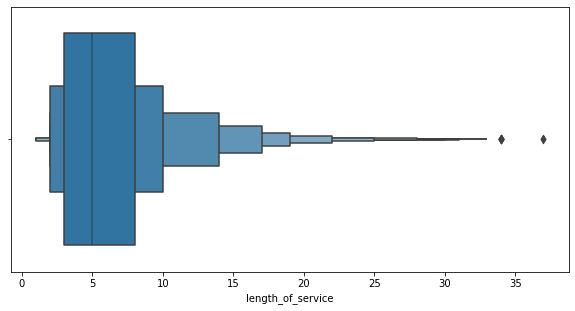

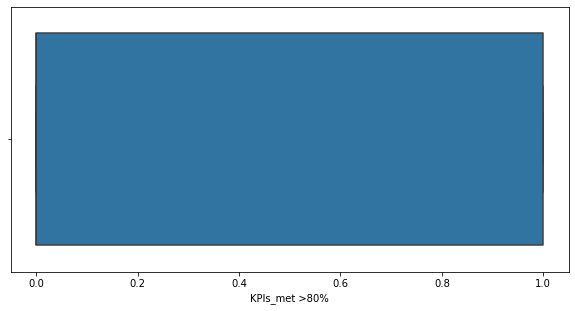

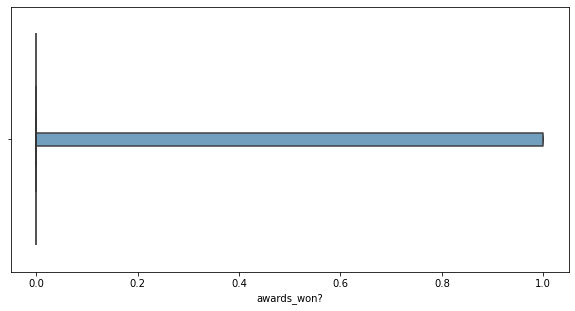

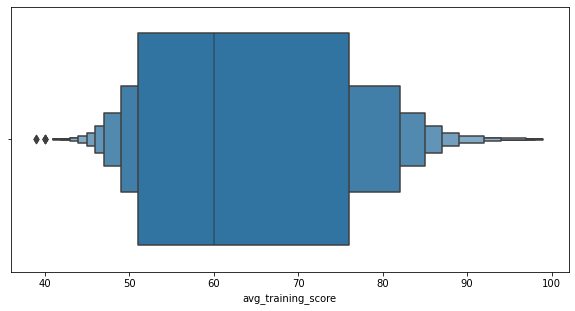

<Figure size 720x2880 with 0 Axes>

In [16]:
for index,column in enumerate(nums):
    fig=plt.figure(figsize=(10,40))
    plt.subplot(7,1,index+1)
    sns.boxenplot(nums[column])
    plt.xlabel(column)

In [17]:
def outliers(x):
    q1 = np.quantile(x,0.25)
    q3 = np.quantile(x,0.75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outlier_values = x[(x<min_range) | (x>max_range)]
    return outlier_values

In [18]:
for i in nums:
  outlier_values = outliers(nums[i])
  print(outlier_values)

Series([], Name: employee_id, dtype: int64)
3        2
5        2
13       2
24       2
31       2
        ..
54788    2
54789    3
54798    2
54800    2
54802    2
Name: no_of_trainings, Length: 9260, dtype: int64
33       57
42       59
49       56
99       60
234      54
         ..
54628    57
54633    54
54749    55
54757    54
54792    59
Name: age, Length: 2051, dtype: int64
13       16
42       26
60       17
99       17
109      19
         ..
54617    24
54619    16
54691    19
54695    18
54803    17
Name: length_of_service, Length: 2298, dtype: int64
Series([], Name: KPIs_met >80%, dtype: int64)
122      1
138      1
140      1
200      1
208      1
        ..
54641    1
54702    1
54772    1
54797    1
54799    1
Name: awards_won?, Length: 1126, dtype: int64
Series([], Name: avg_training_score, dtype: int64)
11       1
39       1
60       1
69       1
71       1
        ..
54730    1
54757    1
54761    1
54792    1
54796    1
Name: is_promoted, Length: 4232, dtype: int64


In [19]:
list1 = outliers(train_data['employee_id']).index.to_list()
list2 = outliers(train_data['no_of_trainings']).index.to_list()
list3=outliers(train_data['age']).index.to_list()
list4=outliers(train_data['length_of_service']).index.to_list()
list5=outliers(train_data['awards_won?']).index.to_list()
list6=outliers(train_data['is_promoted']).index.to_list()
list_outliers = list1 + list2+list3+list4+list5+list6
train_data = train_data.drop(list_outliers)

In [23]:
outliers(train_data['employee_id'])

Series([], Name: employee_id, dtype: int64)

In [24]:
outliers(train_data['no_of_trainings'])

Series([], Name: no_of_trainings, dtype: int64)

In [22]:
outliers(train_data['age'])

555      51
837      52
875      51
970      51
984      52
         ..
54145    51
54616    51
54658    52
54670    52
54777    52
Name: age, Length: 375, dtype: int64

In [25]:
outliers(train_data['length_of_service'])

74       14
180      15
259      14
274      15
358      14
         ..
54589    15
54592    14
54689    15
54697    15
54754    14
Name: length_of_service, Length: 740, dtype: int64

In [26]:
outliers(train_data['awards_won?'])

Series([], Name: awards_won?, dtype: int64)

In [27]:
outliers(train_data['is_promoted'])

Series([], Name: is_promoted, dtype: int64)

In [28]:
train_data.shape

(32459, 14)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

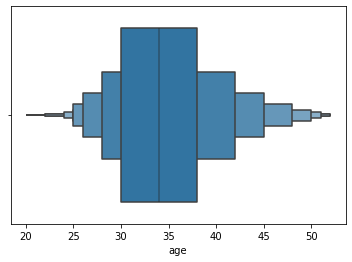

In [29]:
sns.boxenplot(train_data['age'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

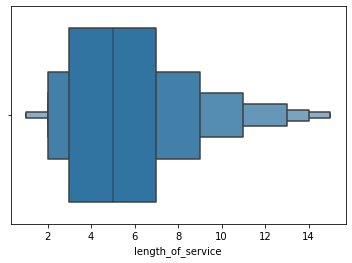

In [30]:
sns.boxenplot(train_data['length_of_service'])

In [31]:
nums_arr = normalize(nums)
nums = pd.DataFrame(nums_arr, columns=nums.columns)
nums.head()

,employee_id,no_of_trainings,age,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.000000,0.000015,0.000535,0.000122,0.000015,0.0,0.000749,0.0
1,0.999999,0.000015,0.000461,0.000061,0.000000,0.0,0.000921,0.0
2,0.999967,0.000133,0.004525,0.000932,0.000000,0.0,0.006655,0.0
3,0.999681,0.000787,0.015337,0.003933,0.000000,0.0,0.019663,0.0
4,0.999998,0.000020,0.000919,0.000041,0.000000,0.0,0.001491,0.0


In [32]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [33]:
le = LabelEncoder()
train_data['department'] = le.fit_transform(train_data['department'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3, 'Operations': 4, 'Procurement': 5, 'R&D': 6, 'Sales & Marketing': 7, 'Technology': 8}


In [34]:
le = LabelEncoder()
train_data['region'] = le.fit_transform(train_data['region'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'region_1': 0, 'region_10': 1, 'region_11': 2, 'region_12': 3, 'region_13': 4, 'region_14': 5, 'region_15': 6, 'region_16': 7, 'region_17': 8, 'region_18': 9, 'region_19': 10, 'region_2': 11, 'region_20': 12, 'region_21': 13, 'region_22': 14, 'region_23': 15, 'region_24': 16, 'region_25': 17, 'region_26': 18, 'region_27': 19, 'region_28': 20, 'region_29': 21, 'region_3': 22, 'region_30': 23, 'region_31': 24, 'region_32': 25, 'region_33': 26, 'region_34': 27, 'region_4': 28, 'region_5': 29, 'region_6': 30, 'region_7': 31, 'region_8': 32, 'region_9': 33}


In [35]:
le = LabelEncoder()
train_data['education'] = le.fit_transform(train_data['education'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{"Bachelor's": 0, 'Below Secondary': 1, "Master's & above": 2}


In [36]:
train_data1 = pd.get_dummies(train_data[['gender','recruitment_channel']])

In [37]:
train_data = pd.concat([train_data['employee_id'], train_data1, train_data['department'], train_data['region'],train_data['education']], axis=1)

In [38]:
train_data.head()

,employee_id,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,department,region,education
0,65438,1,0,0,0,1,7,31,2
1,65141,0,1,1,0,0,4,14,0
2,7513,0,1,0,0,1,7,10,0
4,48945,0,1,1,0,0,8,18,0
6,20379,1,0,1,0,0,4,12,0


In [39]:
test_data.shape

(23490, 13)

In [40]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [42]:
for i in test_data.columns:
  print(test_data[i].value_counts())
  print('---------------------------------------------')

8724     1
3415     1
75343    1
54882    1
56131    1
        ..
30620    1
2485     1
73199    1
77062    1
5973     1
Name: employee_id, Length: 23490, dtype: int64
---------------------------------------------
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: department, dtype: int64
---------------------------------------------
region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_

In [43]:
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [44]:
series = test_data.isna().sum()
missing_total = series[series.values>0]

series1 = round(test_data.isna().mean()*100, 4)
missing_percentage = series1[series1.values>0]

df1= pd.concat([missing_total, missing_percentage], axis=1, keys=['Missing_total', 'Missing_percentage'])
df1

,Missing_total,Missing_percentage
education,1034,4.4019
previous_year_rating,1812,7.7139


In [45]:
test_data = test_data.dropna(how ='any')
test_data.isna().sum().sum()

0

In [46]:
test_data.shape

(20819, 13)

In [47]:
le = LabelEncoder()
test_data['department'] = le.fit_transform(test_data['department'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Analytics': 0, 'Finance': 1, 'HR': 2, 'Legal': 3, 'Operations': 4, 'Procurement': 5, 'R&D': 6, 'Sales & Marketing': 7, 'Technology': 8}


In [48]:
le = LabelEncoder()
test_data['region'] = le.fit_transform(test_data['region'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'region_1': 0, 'region_10': 1, 'region_11': 2, 'region_12': 3, 'region_13': 4, 'region_14': 5, 'region_15': 6, 'region_16': 7, 'region_17': 8, 'region_18': 9, 'region_19': 10, 'region_2': 11, 'region_20': 12, 'region_21': 13, 'region_22': 14, 'region_23': 15, 'region_24': 16, 'region_25': 17, 'region_26': 18, 'region_27': 19, 'region_28': 20, 'region_29': 21, 'region_3': 22, 'region_30': 23, 'region_31': 24, 'region_32': 25, 'region_33': 26, 'region_34': 27, 'region_4': 28, 'region_5': 29, 'region_6': 30, 'region_7': 31, 'region_8': 32, 'region_9': 33}


In [49]:
le = LabelEncoder()
test_data['education'] = le.fit_transform(test_data['education'])
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{"Bachelor's": 0, 'Below Secondary': 1, "Master's & above": 2}


In [50]:
test_data1 = pd.get_dummies(test_data[['gender','recruitment_channel']])

In [51]:
test_data = pd.concat([test_data['employee_id'], test_data1, test_data['department'], test_data['region'],test_data['education']], axis=1)

In [52]:
test_data.head()

,employee_id,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,department,region,education
1,74430,1,0,1,0,0,2,28,0
2,72255,0,1,1,0,0,7,4,0
3,38562,1,0,1,0,0,5,11,0
4,64486,0,1,0,0,1,1,21,0
5,46232,0,1,0,0,1,5,31,0


In [53]:
train_data.columns

Index(['employee_id', 'gender_f', 'gender_m', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'department', 'region', 'education'],
      dtype='object')

In [54]:
x=train_data[['employee_id', 'gender_f', 'gender_m', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing', 'region', 'education']]
y=train_data['department']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state = 42)

# RandomForestClassifier

In [56]:
rf_cl = RandomForestClassifier()
rf_cl.fit(x_train,y_train)
y_pred = rf_cl.predict(x_test)
f1_score(y_test,y_pred, average='weighted')

0.218475371264159

In [57]:
x.shape

(32459, 8)

In [58]:
test_data.shape

(20819, 9)

In [59]:
department= rf_cl.predict(test_data.drop('employee_id', axis=1))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- department
Feature names seen at fit time, yet now missing:
- employee_id

  warnings.warn(message, FutureWarning)


In [60]:
department

array([5, 8, 0, ..., 4, 7, 4])

In [61]:
test_data['department'] =department
test_data.head()

,employee_id,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,department,region,education
1,74430,1,0,1,0,0,5,28,0
2,72255,0,1,1,0,0,8,4,0
3,38562,1,0,1,0,0,0,11,0
4,64486,0,1,0,0,1,4,21,0
5,46232,0,1,0,0,1,8,31,0


In [62]:
test_data.shape

(20819, 9)

In [63]:
final_format = test_data[['employee_id', 'department']]
final_format

,employee_id,department
1,74430,5
2,72255,8
3,38562,0
4,64486,4
5,46232,8
...,...,...
23484,47537,0
23485,53478,8
23486,25600,4
23487,45409,7


In [64]:
final_csv = final_format.to_csv('submission.csv')